### C3.Logistic_Regression_with_Keras

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../../data/raw/portfolio/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


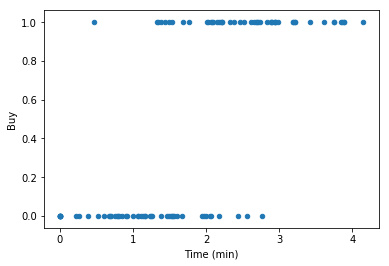

In [7]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [11]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='sigmoid')) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
X = df['Time (min)']
y = df.Buy

In [17]:
np.shape(X)

(100,)

In [19]:
model.fit(X, y, epochs=25, verbose=0)

In [20]:
y_pred = model.predict(X)

In [29]:
y_pred[:5]

array([[0.5497633 ],
       [0.139879  ],
       [0.8872157 ],
       [0.18474165],
       [0.37406415]], dtype=float32)

In [28]:
y_pred_class = y_pred > 0.5

In [30]:
y_pred_class [:5]

array([[ True],
       [False],
       [ True],
       [False],
       [False]])

In [31]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Buy, dtype: int64

Text(0.5, 1.0, 'Prediction with epochs=50')

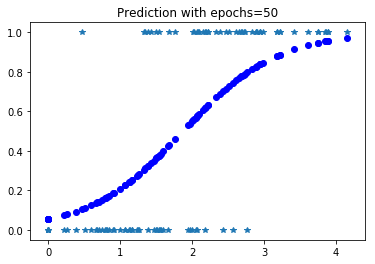

In [44]:
plt.plot(X, y,  "*") 
plt.scatter(X, y_pred, color='b')
plt.title('Prediction with epochs=25')

Text(0.5, 1.0, 'Prediction with epochs=25')

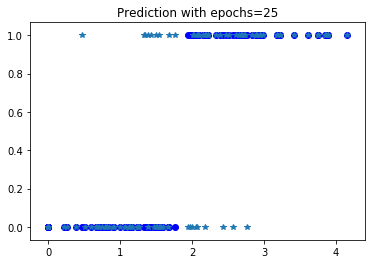

In [45]:
plt.plot(X, y,  "*") 
plt.scatter(X, y_pred_class, color='b')
plt.title('Prediction with epochs=25')

In [84]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred_class)
accuracy

0.82

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)